## Import section

In [1]:
# from pandas import read_csv
import pandas as pd

import numpy as np
from keras.models import Sequential

from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

## Download & prepare dataset

In [2]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
df = pd.read_csv(sunspots_url)
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
5,1749-06,83.5
6,1749-07,94.8
7,1749-08,66.3
8,1749-09,75.9
9,1749-10,75.5


In [3]:
df.tail()

,Month,Sunspots
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3
2819,1983-12,33.4


In [4]:
df = pd.read_csv(sunspots_url,  usecols=[1])
data = np.array(df.values.astype('float32'))

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data).flatten()

n = len(data)
print(f'total {n} values')
# Point for splitting data into train and test
split = int(n* 0.8)

train_data = data[range(split)]
test_data = data[split:]

total 2820 values


In [5]:
train_data.shape

(2256,)

In [6]:
train_data[:13]

array([0.22852638, 0.24665089, 0.2758077 , 0.21946414, 0.33490935,
       0.3289992 , 0.37352246, 0.2612293 , 0.29905435, 0.29747832,
       0.6249015 , 0.33569738, 0.28881007], dtype=float32)

In [7]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    # Y = target data
    Y = dat[Y_ind]
    # Prepare X = features
    rows_x = len(Y)
    print('number of rows:', rows_x)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

# perpare the features and labels
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

number of rows: 187
number of rows: 46


In [10]:
trainY[0]

0.28881007

In [11]:
trainX.shape, testX.shape, trainY.shape

((187, 12, 1), (46, 12, 1), (187,))

## Build RNN Model

In [12]:
# Keras SimpleRNN
hidden_units = 10
output_size = 1

input_shape=(time_steps, 1)

model = Sequential()
model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                    activation='tanh'))
model.add(Dense(units=output_size, activation='sigmoid'))


model.compile(loss='mean_squared_error', optimizer='adam')
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model.fit(trainX, trainY, epochs=100, validation_split=0.1, verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 54ms/step - loss: 0.0879 - val_loss: 0.0768
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0712 - val_loss: 0.0595
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0556 - val_loss: 0.0441
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0418 - val_loss: 0.0317
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0304 - val_loss: 0.0231
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0231 - val_loss: 0.0174
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0176 - val_loss: 0.0139
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0137 - val_loss: 0.0117
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0112 - val_loss: 0.0100
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0094 - val_loss: 0.0088
Epoch 11/100
6/6 [=======

Epoch 84/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 85/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 86/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 87/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 88/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 89/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 90/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 91/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 92/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 93/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 94/10

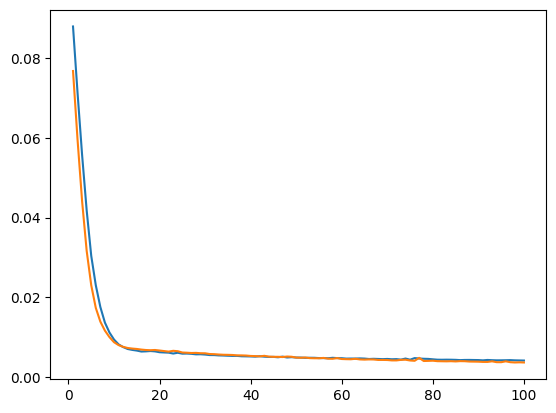

In [14]:
# !pip install -q git+https://github.com/tensorflow/docs

# import tensorflow_docs as tfdocs
# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

# plotter.plot({'RNN ': hist}, metric = "loss")
# plt.ylim([0, .03])
# plt.ylabel('MSE')

import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(x= range(1, 101),y= hist.history['loss'])
sns.lineplot(x=range(1, 101), y=hist.history['val_loss'])
plt.show()

In [15]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 4ms/step
Train RMSE: 0.064 RMSE
Test RMSE: 0.092 RMSE


## Prediction vs Actual

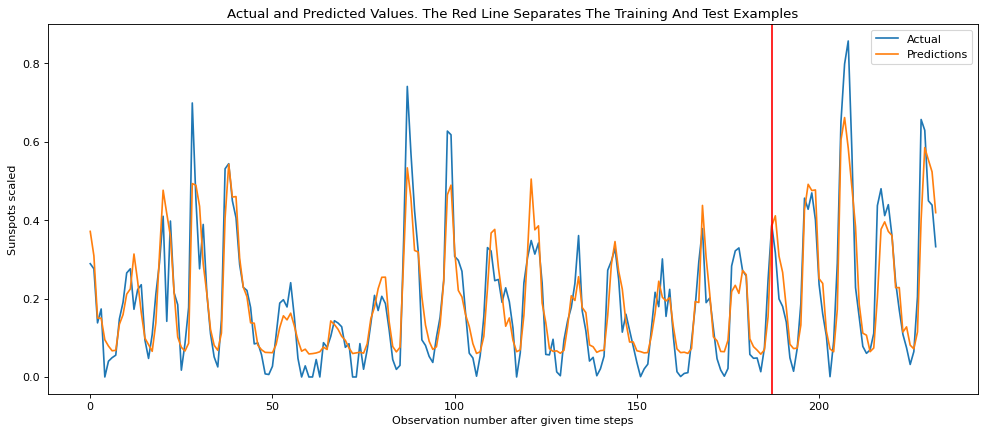

In [16]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    
    rows = len(actual)
    
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    
    plt.axvline(x=len(trainY), color='r')
    
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

Self study : https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/